In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import SGD
from keras.losses import binary_crossentropy 
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


import cv2

In [3]:
TRAIN_PATH = '../datasets/dogs-vs-cats-redux-kernels-edition/train'
TEST_PATH = '../datasets/dogs-vs-cats-redux-kernels-edition/test'
SAVED_MODEL_PATH = './output/'

target_size = (224,224)
batch_size = 256 
epoch = 10 

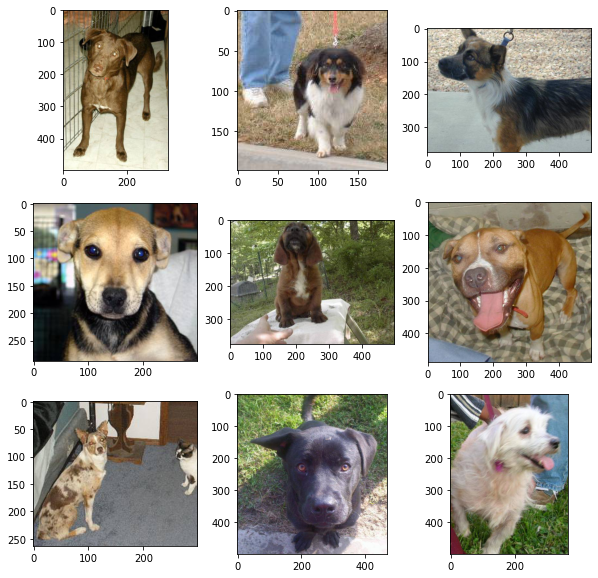

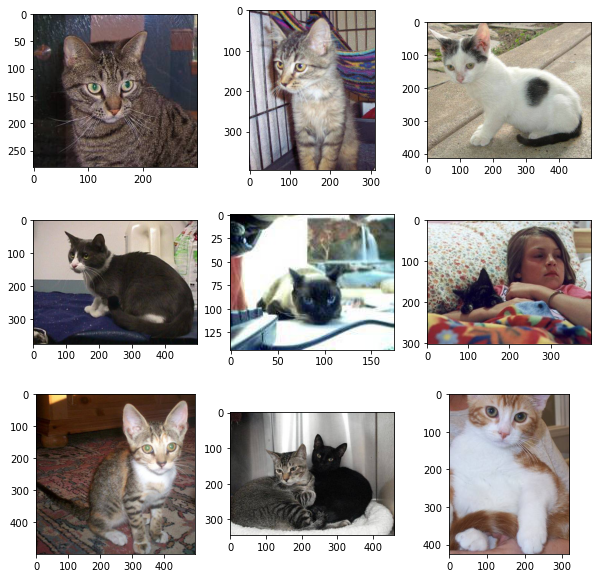

In [4]:
#Process the dataset 

from matplotlib import pyplot

from matplotlib.image import imread

pyplot.figure(figsize=(10,10))
#dogs
for i in range(1,10):
    pyplot.subplot(3,3,i)
    filename = "dog.{}.jpg".format(i)
    filepath = "/".join([TRAIN_PATH, 'dog', filename])
    image = imread(filepath)
    pyplot.imshow(image)

pyplot.show()

pyplot.figure(figsize=(10,10))
for i in range(1,10):
    pyplot.subplot(3,3,i)
    filename = "cat.{}.jpg".format(i)
    filepath = "/".join([TRAIN_PATH, 'cat', filename])
    image = imread(filepath)
    pyplot.imshow(image)

pyplot.show()

### Configre training dataset

In [5]:
train_gen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_dataset = train_gen.flow_from_directory(
    TRAIN_PATH,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
    ) 

valid_dataset = train_gen.flow_from_directory(
    TRAIN_PATH,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
) 

print("Number of training steps: {}".format(len(train_dataset)))
print("Number of validating steps: {}".format(len(valid_dataset)))

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Number of training steps: 79
Number of validating steps: 20


In [6]:
def summarize_diagnostic(history, path = ''):
    pyplot.figure(figsize=(8,8))
    pyplot.figtext(0.5, 1, path, ha='center', fontsize=12)
    pyplot.subplot(211)
    pyplot.title("Loss")
    pyplot.plot(history.history['loss'], color="blue", label="train loss")
    pyplot.plot(history.history['val_loss'], color="yellow", label="validation loss")
    pyplot.subplot(212)
    pyplot.title("Accuracy")
    pyplot.plot(history.history['accuracy'], color="blue", label="train accuracy")
    pyplot.plot(history.history['val_accuracy'], color="yellow", label="validation accuracy")
    if(path!= ''):
        pyplot.savefig(path)



### Setup baseline models

In [7]:
def compile_model(model):
    model.compile(optimizer = SGD(learning_rate=0.001, momentum=0.9), loss=binary_crossentropy, metrics=['accuracy'])
    return model

def one_conv2d_layer():
    model = Sequential()
    model.add( Conv2D (32, (3,3), padding="same", activation='relu', kernel_initializer='he_uniform', input_shape=(224,224,3)))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))

    model = compile_model(model)
    return model

def three_conv2d_layers():
    model = Sequential()
    model.add( Conv2D (32, (3,3), padding="same", activation='relu', kernel_initializer='he_uniform', input_shape=(224,224,3)))
    model.add(MaxPooling2D(2,2))
    model.add( Conv2D (64, (3,3), padding="same", activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(2,2))
    model.add( Conv2D (128, (3,3), padding="same", activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))

    model = compile_model(model)
    return model

def three_conv_2d_layers_with_dropout():
    model = Sequential()
    model.add( Conv2D (32, (3,3), padding="same", activation='relu', kernel_initializer='he_uniform', input_shape=(224,224,3)))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    model.add( Conv2D (64, (3,3), padding="same", activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    model.add( Conv2D (128, (3,3), padding="same", activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    model = compile_model(model)
    return model

### Setup training routine

In [8]:
def train(model):
    return model.fit(
        train_dataset, 
        steps_per_epoch=len(train_dataset), 
        validation_data=valid_dataset, 
        validation_steps = len(valid_dataset),
        epochs=epoch,
        verbose=1
        )

### Train and evaluate

Epoch 1/10
79/79 [==============================] - 268s 3s/step - loss: 0.7155 - accuracy: 0.5389 - val_loss: 0.6874 - val_accuracy: 0.5740
Epoch 2/10
79/79 [==============================] - 256s 3s/step - loss: 0.6809 - accuracy: 0.5853 - val_loss: 0.6734 - val_accuracy: 0.5854
Epoch 3/10
79/79 [==============================] - 256s 3s/step - loss: 0.6635 - accuracy: 0.6107 - val_loss: 0.6552 - val_accuracy: 0.6172
Epoch 4/10
79/79 [==============================] - 248s 3s/step - loss: 0.6531 - accuracy: 0.6126 - val_loss: 0.6394 - val_accuracy: 0.6344
Epoch 5/10
79/79 [==============================] - 257s 3s/step - loss: 0.6376 - accuracy: 0.6331 - val_loss: 0.6321 - val_accuracy: 0.6312
Epoch 6/10
79/79 [==============================] - 250s 3s/step - loss: 0.6266 - accuracy: 0.6443 - val_loss: 0.6152 - val_accuracy: 0.6580
Epoch 7/10
79/79 [==============================] - 250s 3s/step - loss: 0.6169 - accuracy: 0.6524 - val_loss: 0.6091 - val_accuracy: 0.6698
Epoch 8/10
79

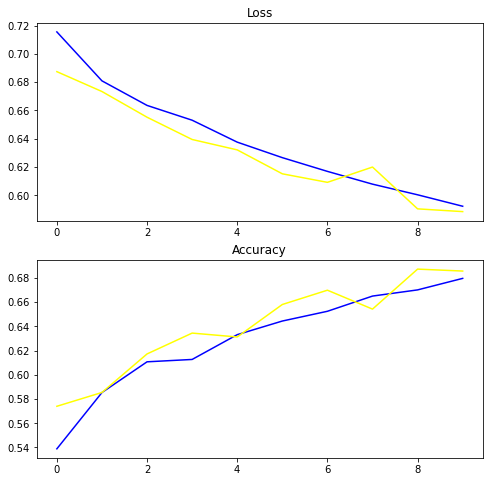

In [9]:
# model = one_conv2d_layer()
model = three_conv2d_layers()
history = train(model)
model.save(SAVED_MODEL_PATH)
summarize_diagnostic(history)

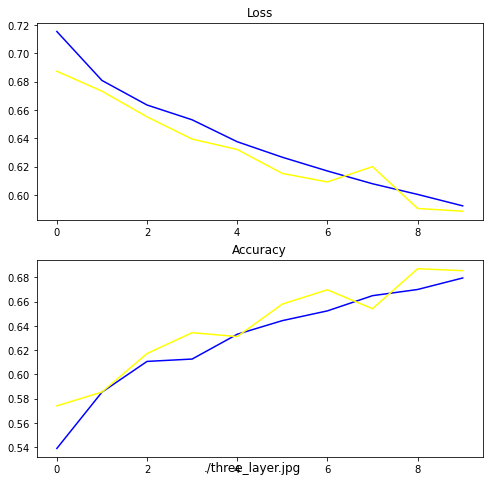

In [12]:
summarize_diagnostic(history=history, path='./three_layer.jpg')

In [11]:
def load_image(path):
    img = load_img(path, target_size=target_size)
    img = img_to_array(img)
    img = img.reshape(1,224,224, 3)

    return img

img = load_image('/'.join([TEST_PATH, 'test', '1.jpg']))
result = model.predict(img)
print(result)


[[1.]]


### Evaluate on test dataset